<img src="https://ciencias.medellin.unal.edu.co/eventos/cryptoco/images/iconos/Logo_Macc_HINNT_1.png" alt="Header" style="width: 800px;"/>

# Tarea 4

Nicolás Guillermo Avilán Vargas
```
Camilo Fernandez
```

Mayo, 2023

-----

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy import integrate

In [101]:
def norma(x):
  return sp.sqrt(np.dot(x,x)).simplify()
def lim(arr, var, limit):
    return [sp.limit(i, var, limit) for i in arr]

# PUNTO 1

### 1.

Considere la esféra $x^2+y^2+z^2=1$ y defina la proyección estereográfica como:

$$\pi = S^2/\{N\} \longrightarrow \mathbb{R}^{2}$$ 

Dónde $\{N\}=(0,0,1)$,  corresponde al polo norte de la esféra. 

Ahora, si nos limitamos al plano $(x, z)$ y usando triángulos similares como se muestra en la siguiente imágen, se tiene que las coordenadas de la proyección estereográfica están dadas por:

$$\frac{X}{1} = \frac{X-x}{z}$$

tal que: 


$$Xz = X - x$$

<img src="https://raw.githubusercontent.com/DarkfireT09/Geometria/main/Corte4/triangulos.png">

De forma tal, que:

$$X = \frac{x}{1-z}$$
Vea que esto se mantiene en el plano $(y, z)$. 

En consecuencia, $$\pi = S^2/\{N\} \longrightarrow \mathbb{R}^2$$ está dada por:

$$X = \frac{x}{1-z}$$

$$Y = \frac{y}{1-z}$$

### 2. 

Sean $N = (0, 0, 1)$ y $S = (0, 0, -1)$ los polos norte y sur de la esféra, respectivamente.

### 3. 

Ahora, si la esféra $S^2$ se parametriza en coordenadas polares de la forma

$$\vec{x}(\theta, \phi) = (sin\theta cos\phi, sin\theta sin\phi, cos\theta)$$

y tomando a $p = (x,y,z)$ un punto arbitrario sobre la esféra de modo que su proyección estereográfica es $Q = (X, Y, 0)$, es posible definir la parametrización como:

$$L(t) = tP+(1-t)N$$
$$t P_z + (1-t)N_z = 0$$
$$tz +(1-t) = 0$$
De forma que $t = \frac{1}{1-z}$ y $$L(z) =  \frac{1}{1-z}P+(1- \frac{1}{1-z})N$$. 

Entonces, la proyección del punto $p$ con coordenadas $(sin\theta cos\phi, sin\theta sin\phi, cos\theta)$ se puede definir como:

$$\begin{aligned} Q &= \big( \frac{sin\theta cos\phi}{1-cos\theta}, \frac{sin\theta sin\phi}{1-cos\theta}, \frac{cos\theta}{1-cos\theta} +1-\frac{1}{1-cos\theta}  \big) \\ &= \big( \frac{sin\theta cos\phi}{1-cos\theta}, \frac{sin\theta sin\phi}{1-cos\theta}, 0  \big) \end{aligned}$$

Luego, las coordenadas estereográficas están dadas por:

$$X = \frac{sin\theta cos\phi}{1-cos\theta}$$

$$\quad Y = \frac{sin\theta sin\phi}{1-cos\theta}$$

y como $\frac{sin\theta}{1-cos\theta} = cot\big(\frac{\theta}{2}\big)$, se tiene que las coprdenadas son:

$$X = cot\big(\frac{\theta}{2}\big) cos\phi$$
 $$\quad Y = cot\big(\frac{\theta}{2}\big) sin\phi$$


# PUNTO 2

In [102]:
theta, phi, a, b, c = sp.symbols("theta, phi, a, b, c", reals = True)
e,f,g,E,F,G = sp.symbols("e,f,g,E,F,G", reals=True)
x = a*sp.sin(theta)*sp.cos(phi)
y = b*sp.sin(theta)*sp.sin(phi)
z = c*sp.cos(theta)

X = (x, y, z)
X

(a*sin(theta)*cos(phi), b*sin(phi)*sin(theta), c*cos(theta))

In [103]:
dX_theta = [sp.diff(x, theta),sp.diff(y, theta),sp.diff(z, theta)]
dX_phi = [sp.diff(x, phi), sp.diff(y, phi), sp.diff(z, phi)]
dX_thetatheta = [sp.diff(x, theta,2),sp.diff(y, theta,2),sp.diff(z, theta,2)]
dX_phiphi = [sp.diff(x, phi, 2), sp.diff(y, phi, 2), sp.diff(z, phi, 2)]
dX_thetaphi = [sp.diff(x, theta, phi),sp.diff(y, theta, phi),sp.diff(z, theta, phi)]

## Primera forma fundamental

In [104]:
E = np.dot(dX_theta, dX_theta).simplify()
E

a**2*cos(phi)**2*cos(theta)**2 + b**2*sin(phi)**2*cos(theta)**2 + c**2*sin(theta)**2

In [105]:
F = np.dot(dX_theta, dX_phi).simplify()
F

(-a**2 + b**2)*(cos(2*phi - 2*theta) - cos(2*phi + 2*theta))/8

In [106]:
G = np.dot(dX_phi, dX_phi).simplify()
G

(a**2*sin(phi)**2 + b**2*cos(phi)**2)*sin(theta)**2

## Tensor métrico

In [107]:
g = sp.Matrix([[E, F], [F, G]])
g

Matrix([
[a**2*cos(phi)**2*cos(theta)**2 + b**2*sin(phi)**2*cos(theta)**2 + c**2*sin(theta)**2, (-a**2 + b**2)*(cos(2*phi - 2*theta) - cos(2*phi + 2*theta))/8],
[                      (-a**2 + b**2)*(cos(2*phi - 2*theta) - cos(2*phi + 2*theta))/8,            (a**2*sin(phi)**2 + b**2*cos(phi)**2)*sin(theta)**2]])

## Elemento de área

In [108]:
eArea = norma(np.cross(dX_theta, dX_phi))
eArea

sqrt((a**2*b**2*cos(theta)**2 + a**2*c**2*sin(phi)**2*sin(theta)**2 + b**2*c**2*sin(theta)**2*cos(phi)**2)*sin(theta)**2)

## Área total

In [109]:
eAreaE = eArea.subs(a, 3).subs(b, 2).subs(c, 1)
eAreaE

sqrt((9*sin(phi)**2*sin(theta)**2 + 4*sin(theta)**2*cos(phi)**2 + 36*cos(theta)**2)*sin(theta)**2)

In [110]:
f = sp.lambdify((theta, phi), eAreaE)
A = integrate.dblquad(f, 0, 2*np.pi, lambda x: 0, lambda x: np.pi)
print("El área de la elipsoide es: ", A[0])

El área de la elipsoide es:  48.88214630258221


## Segunda forma fundamental

In [111]:
N = np.cross(dX_theta, dX_phi)/norma(np.cross(dX_phi, dX_theta))
N = [sp.simplify(i) for i in N]
N

e = np.dot(N, dX_thetatheta).simplify()
f = np.dot(N, dX_thetaphi).simplify()
g = np.dot(N, dX_phiphi).simplify()

display(e)
display(f)
display(g)

-a*b*c*sin(theta)/sqrt((a**2*b**2*cos(theta)**2 + a**2*c**2*sin(phi)**2*sin(theta)**2 + b**2*c**2*sin(theta)**2*cos(phi)**2)*sin(theta)**2)

0

-a*b*c*sin(theta)**3/sqrt((a**2*b**2*cos(theta)**2 + a**2*c**2*sin(phi)**2*sin(theta)**2 + b**2*c**2*sin(theta)**2*cos(phi)**2)*sin(theta)**2)

## Curvaturas de la superficie

### Curvatura Gaussiana

In [112]:
K = ((e*g-f**2)/(E*G-F**2)).simplify() # Gaussian c.
K

a**2*b**2*c**2/(a**2*b**2*sin(theta)**2 - a**2*b**2 - a**2*c**2*sin(phi)**2*sin(theta)**2 + b**2*c**2*sin(phi)**2*sin(theta)**2 - b**2*c**2*sin(theta)**2)**2

### Curvatura media

In [113]:
H = (0.5*(E*g-2*F*f+G*e)/(E*G-F**2)).simplify()
H

0.5*a*b*c*(a**2*sin(phi)**2*sin(theta)**2 - a**2*sin(theta)**2 + a**2 - b**2*sin(phi)**2*sin(theta)**2 + b**2 + c**2*sin(theta)**2)*sin(theta)/(sqrt((a**2*b**2*cos(theta)**2 + a**2*c**2*sin(phi)**2*sin(theta)**2 + b**2*c**2*sin(theta)**2*cos(phi)**2)*sin(theta)**2)*(a**2*b**2*sin(theta)**2 - a**2*b**2 - a**2*c**2*sin(phi)**2*sin(theta)**2 + b**2*c**2*sin(phi)**2*sin(theta)**2 - b**2*c**2*sin(theta)**2))

In [114]:
k2 = (H + sp.sqrt(H**2-K))
k1 = (H - sp.sqrt(H**2-K))
display(k1)
display(k2)

0.5*a*b*c*(a**2*sin(phi)**2*sin(theta)**2 - a**2*sin(theta)**2 + a**2 - b**2*sin(phi)**2*sin(theta)**2 + b**2 + c**2*sin(theta)**2)*sin(theta)/(sqrt((a**2*b**2*cos(theta)**2 + a**2*c**2*sin(phi)**2*sin(theta)**2 + b**2*c**2*sin(theta)**2*cos(phi)**2)*sin(theta)**2)*(a**2*b**2*sin(theta)**2 - a**2*b**2 - a**2*c**2*sin(phi)**2*sin(theta)**2 + b**2*c**2*sin(phi)**2*sin(theta)**2 - b**2*c**2*sin(theta)**2)) - sqrt(-a**2*b**2*c**2/(a**2*b**2*sin(theta)**2 - a**2*b**2 - a**2*c**2*sin(phi)**2*sin(theta)**2 + b**2*c**2*sin(phi)**2*sin(theta)**2 - b**2*c**2*sin(theta)**2)**2 + 0.25*a**2*b**2*c**2*(a**2*sin(phi)**2*sin(theta)**2 - a**2*sin(theta)**2 + a**2 - b**2*sin(phi)**2*sin(theta)**2 + b**2 + c**2*sin(theta)**2)**2/((a**2*b**2*cos(theta)**2 + a**2*c**2*sin(phi)**2*sin(theta)**2 + b**2*c**2*sin(theta)**2*cos(phi)**2)*(a**2*b**2*sin(theta)**2 - a**2*b**2 - a**2*c**2*sin(phi)**2*sin(theta)**2 + b**2*c**2*sin(phi)**2*sin(theta)**2 - b**2*c**2*sin(theta)**2)**2))

0.5*a*b*c*(a**2*sin(phi)**2*sin(theta)**2 - a**2*sin(theta)**2 + a**2 - b**2*sin(phi)**2*sin(theta)**2 + b**2 + c**2*sin(theta)**2)*sin(theta)/(sqrt((a**2*b**2*cos(theta)**2 + a**2*c**2*sin(phi)**2*sin(theta)**2 + b**2*c**2*sin(theta)**2*cos(phi)**2)*sin(theta)**2)*(a**2*b**2*sin(theta)**2 - a**2*b**2 - a**2*c**2*sin(phi)**2*sin(theta)**2 + b**2*c**2*sin(phi)**2*sin(theta)**2 - b**2*c**2*sin(theta)**2)) + sqrt(-a**2*b**2*c**2/(a**2*b**2*sin(theta)**2 - a**2*b**2 - a**2*c**2*sin(phi)**2*sin(theta)**2 + b**2*c**2*sin(phi)**2*sin(theta)**2 - b**2*c**2*sin(theta)**2)**2 + 0.25*a**2*b**2*c**2*(a**2*sin(phi)**2*sin(theta)**2 - a**2*sin(theta)**2 + a**2 - b**2*sin(phi)**2*sin(theta)**2 + b**2 + c**2*sin(theta)**2)**2/((a**2*b**2*cos(theta)**2 + a**2*c**2*sin(phi)**2*sin(theta)**2 + b**2*c**2*sin(theta)**2*cos(phi)**2)*(a**2*b**2*sin(theta)**2 - a**2*b**2 - a**2*c**2*sin(phi)**2*sin(theta)**2 + b**2*c**2*sin(phi)**2*sin(theta)**2 - b**2*c**2*sin(theta)**2)**2))

## Evaluación del vector normal

In [115]:
display(N)

[b*c*sin(theta)**2*cos(phi)/sqrt((a**2*b**2*cos(theta)**2 + a**2*c**2*sin(phi)**2*sin(theta)**2 + b**2*c**2*sin(theta)**2*cos(phi)**2)*sin(theta)**2),
 a*c*sin(phi)*sin(theta)**2/sqrt((a**2*b**2*cos(theta)**2 + a**2*c**2*sin(phi)**2*sin(theta)**2 + b**2*c**2*sin(theta)**2*cos(phi)**2)*sin(theta)**2),
 a*b*sin(theta)*cos(theta)/sqrt((a**2*b**2*cos(theta)**2 + a**2*c**2*sin(phi)**2*sin(theta)**2 + b**2*c**2*sin(theta)**2*cos(phi)**2)*sin(theta)**2)]

In [116]:
p = (np.pi/2, np.pi/2)

Np = [N[0].subs(theta, p[0]).subs(phi, p[1]), N[1].subs(theta, p[0]).subs(phi, p[1]), N[2].subs(theta, p[0]).subs(phi, p[1])]
Np = [sp.simplify(i) for i in Np]
Np = [i.subs(a, 3).subs(b, 2).subs(c, 1) for i in Np]
Np

[4.08215599715784e-17, 1.00000000000000, 1.22464679914735e-16]

## Visualización

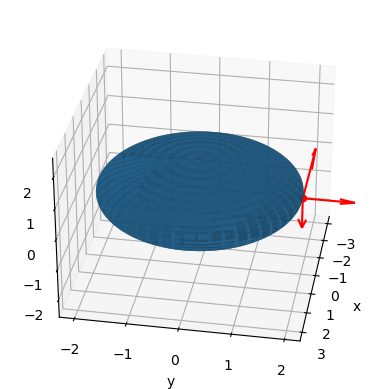

In [117]:
u = np.linspace(0 , 2 * np.pi , 100 )
v = np.linspace(0 , 2*np.pi , 100 )
u, v = np.meshgrid(u , v )
a0 = 3
b0 = 2
c0 = 1

d = a0*np.sin(u)*np.cos(v)
e = b0*np.sin(u)*np.sin(v)
g = c0*np.cos(u)


dX_theta0 = [dX_theta[0].subs({a: 3, b:2, c:1, theta: np.pi/2, phi: np.pi/2}), dX_theta[1].subs({a: 3, b:2, c:1, theta: np.pi/2, phi: np.pi/2}), dX_theta[2].subs({a: 3, b:2, c:1, theta: np.pi/2, phi: np.pi/2})]
dX_phi0 = [dX_phi[0].subs({a: 3, b:2, c:1, theta: np.pi/2, phi: np.pi/2}), dX_phi[1].subs({a: 3, b:2, c:1, theta: np.pi/2, phi: np.pi/2}), dX_phi[2].subs({a: 3, b:2, c:1, theta: np.pi/2, phi: np.pi/2})]


x_p = X[0].subs({a: 3, b:2, c:1, theta: np.pi/2, phi: np.pi/2})
y_p = X[1].subs({a: 3, b:2, c:1, theta: np.pi/2, phi: np.pi/2})
z_p = X[2].subs({a: 3, b:2, c:1, theta: np.pi/2, phi: np.pi/2})
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlim([-2.5, 2.5])
ax.plot_surface(d, e, g, alpha = 0.5)
ax.scatter(x_p, y_p, z_p, color='r')
ax.view_init(azim=10)

ax.quiver(x_p, y_p, z_p, dX_theta0[0], dX_theta0[1], dX_theta0[2], color = (1, 0, 0, 1))
ax.quiver(x_p, y_p, z_p, dX_phi0[0], dX_phi0[1], dX_phi0[2], color = (1, 0, 0, 1))
ax.quiver(x_p, y_p, z_p, Np[0], Np[1], Np[2], color = (1, 0, 0, 1))


# PUNTO 3

In [118]:
theta, t = sp.symbols("theta, t", reals = True, positive=True)
x = (1+0.5*t*sp.cos(theta/2))*sp.cos(theta)
y = (1+0.5*t*sp.cos(theta/2))*sp.sin(theta)
z = 0.5*t*sp.sin(theta/2)

X= (x, y, z)
X

((0.5*t*cos(theta/2) + 1)*cos(theta),
 (0.5*t*cos(theta/2) + 1)*sin(theta),
 0.5*t*sin(theta/2))

In [119]:
dX = [[sp.diff(x, theta), sp.diff(x, t)], [sp.diff(y, theta), sp.diff(y, t)], [sp.diff(z, theta), sp.diff(z, t)]]
dX_theta = [sp.diff(x, theta), sp.diff(y, theta), sp.diff(z, theta)]
dX_t = [sp.diff(x, t), sp.diff(y, t), sp.diff(z, t)]
dX_thetatheta = [sp.diff(x, theta, 2), sp.diff(y, theta, 2), sp.diff(z, theta, 2)]
dX_tt = [sp.diff(x, t, 2), sp.diff(y, t, 2), sp.diff(z, t, 2)]
dX_thetatt = [sp.diff(x, theta, t), sp.diff(y, theta, t), sp.diff(z, theta, t)]

## Primera forma fundamental

In [120]:
E = np.dot(dX_theta, dX_theta).simplify()
print(E)

-0.25*t**2*sin(theta/2)**2 + 0.3125*t**2 + 1.0*t*cos(theta/2) + 1.0


In [121]:
F = np.dot(dX_theta, dX_t).simplify()
print(F)

0


In [122]:
G = np.dot(dX_t, dX_t).simplify()
print(G)

0.250000000000000


## Tensor métrico

In [123]:
g = sp.Matrix([[E, F], [F, G]])
g

Matrix([
[-0.25*t**2*sin(theta/2)**2 + 0.3125*t**2 + 1.0*t*cos(theta/2) + 1.0,    0],
[                                                                  0, 0.25]])

## Elemento de área

In [124]:
eArea2 = norma(np.cross(dX_theta, dX_t))
eArea2

0.5*sqrt(0.25*(0.5*t*sin(theta) - 0.25*t*sin(2*theta) + sin(theta/2) - sin(3*theta/2))**2 + 0.25*(0.5*t*cos(theta/2)**2*cos(theta) + 0.25*t*cos(theta) - 0.375*t*cos(2*theta) + 0.125*t + cos(theta/2) - cos(3*theta/2))**2 + (-0.25*t*sin(theta/2)*sin(theta)*cos(theta) - 0.5*t*sin(theta)**2*cos(theta/2) + 0.75*t*cos(theta/2) - 0.0625*t*cos(3*theta/2) - 0.1875*t*cos(5*theta/2) + 1.0)**2*cos(theta/2)**2)

## Área total

In [125]:
f = sp.lambdify((theta, t), eArea2)

In [126]:
A = integrate.dblquad(f, -0.25, 0.25, lambda x: 0, lambda x: 2*np.pi)
print("El area de la superficie es: ", A[0]) 

El area de la superficie es:  1.5718231960534048


## Vector Normal

In [127]:
N = np.cross(dX_theta, dX_t)/norma(np.cross(dX_t, dX_theta))
N

array([2.0*(-0.125*t*sin(theta)*cos(theta/2)**2 + 0.5*(-0.25*t*sin(theta/2)*sin(theta) + (0.5*t*cos(theta/2) + 1)*cos(theta))*sin(theta/2))/sqrt(0.25*(0.5*t*sin(theta) - 0.25*t*sin(2*theta) + sin(theta/2) - sin(3*theta/2))**2 + 0.25*(0.5*t*cos(theta/2)**2*cos(theta) + 0.25*t*cos(theta) - 0.375*t*cos(2*theta) + 0.125*t + cos(theta/2) - cos(3*theta/2))**2 + (0.25*t*sin(theta/2)*sin(theta)*cos(theta) + 0.5*t*sin(theta)**2*cos(theta/2) - 0.75*t*cos(theta/2) + 0.0625*t*cos(3*theta/2) + 0.1875*t*cos(5*theta/2) - 1.0)**2*cos(theta/2)**2),
       2.0*(0.125*t*cos(theta/2)**2*cos(theta) - 0.5*(-0.25*t*sin(theta/2)*cos(theta) - (0.5*t*cos(theta/2) + 1)*sin(theta))*sin(theta/2))/sqrt(0.25*(0.5*t*sin(theta) - 0.25*t*sin(2*theta) + sin(theta/2) - sin(3*theta/2))**2 + 0.25*(0.5*t*cos(theta/2)**2*cos(theta) + 0.25*t*cos(theta) - 0.375*t*cos(2*theta) + 0.125*t + cos(theta/2) - cos(3*theta/2))**2 + (0.25*t*sin(theta/2)*sin(theta)*cos(theta) + 0.5*t*sin(theta)**2*cos(theta/2) - 0.75*t*cos(theta/2) + 0.0

## Evaluación del vector normal

In [128]:
t0 = 0
Np = [i.subs(t, t0) for i in N]

Np0 = lim(Np, theta, 0)
Np2pi = lim(Np, theta, 2*np.pi)

print(lim(Np, theta, 0))
print(lim(Np, theta, 2*np.pi))

[0, 0, -1]
[1.22464679914735e-16, -2.99951956532372e-32, 1.00000000000000]


Vea que al evaluar el vector normal en el punto $t=0$ y al evaluar los limites de cuando $\theta$ tiende a $0$ y $2\pi$, se obtiene que:

1. Cuando $\theta$ tiende a $0$, el vector normal tiende a $(0, 0, 1)$

2. Cuando $\theta$ tiende a $2\pi$, el vector normal tiende a $(0, 0, -1)$

Vea que como uno de los vectores es el opuesto del otro, entonces el vector normal no es continuo en el punto $t=0$, por tanto podemos concluir que la tira de Möbius no es una superficie orientable.



## Vizualización

In [129]:
X0 = [i.subs({t: t0, theta: 0}) for i in X]
X2pi = [i.subs({t: t0, theta: 2*np.pi}) for i in X]

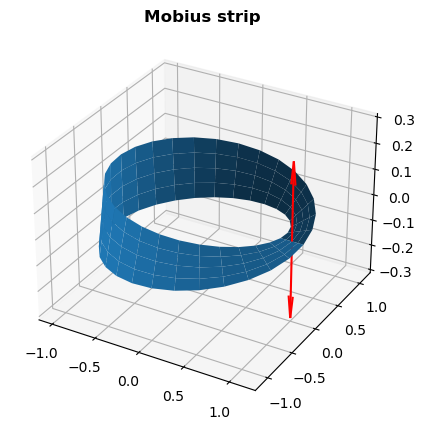

In [130]:
fig = plt.figure(figsize = (9 , 5 ) )
ax = plt.axes(projection = "3d")
a = np.linspace(0 , 2.0*np.pi , 30 )
b = np.linspace(-0.25 , 0.25 , 5 )
a , b = np.meshgrid(a,b)
x = ( 1 + 0.5 * b * np . cos ( a/2.0 ) ) * np.cos( a )
y = ( 1 + 0.5 * b * np . cos ( a/2.0 ) ) * np.sin( a )
z = 0.5 * b * np.sin( a/2.0)
ax.plot_surface(x , y , z , linewidth = 2 )
ax.set_title( "Mobius strip" , weight = "bold" )
ax.set_zlim([-0.3, 0.3])
ax.quiver(X0[0], X0[1], X0[2], Np0[0], Np0[1], Np0[2], color = (1, 0, 0, 1), length = 0.3)
ax.quiver(X2pi[0], X2pi[1], X2pi[2], Np2pi[0], Np2pi[1], Np2pi[2], color = (1, 0, 0, 1), length = 0.3)
plt.show()